We will analyze the Uber Pickups in New York City dataset.

In [67]:
# pretty display of variables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#!dir "./data/uber-pickups-in-new-york-city"

In [3]:
import pandas as pd

In [4]:
apr_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv")
may_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-may14.csv")
jun_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv")
jul_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv")
aug_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv")
sep_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv")


In [5]:
frames = [apr_data, may_data, jun_data, jul_data, aug_data, sep_data]
uber_2014  = pd.concat(frames)

In [6]:
uber_2014.shape

(4534327, 4)

In [7]:
uber_2014.head(10)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512
7,4/1/2014 0:45:00,40.7620,-73.9790,B02512
8,4/1/2014 0:55:00,40.7524,-73.9960,B02512
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512


In [8]:
 data_2014 = uber_2014.sample(frac=0.01, replace=False, random_state=1);

Let's work and prototype on as maller simple, for themoment.

In [9]:
data_2014.shape

(45343, 4)

In [10]:
# adding a column of ones to compute some statistics
data_2014['n'] = 1

In [11]:
data_2014.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'n'], dtype='object')

In [12]:
# lets rename our Date/Time column for an easier handeling.

In [13]:
data_2014.rename(columns={'Date/Time':'DateTime'}, inplace=True)

In [14]:
data_2014.columns

Index(['DateTime', 'Lat', 'Lon', 'Base', 'n'], dtype='object')

In [15]:
data_2014.head()

,DateTime,Lat,Lon,Base,n
753909,8/26/2014 19:49:00,40.7270,-73.9767,B02682,1
601873,8/31/2014 14:40:00,40.7482,-73.9927,B02617,1
890927,9/10/2014 15:48:00,40.7557,-73.9895,B02764,1
433155,8/15/2014 20:47:00,40.7081,-74.0116,B02617,1
169714,9/17/2014 15:10:00,40.7417,-73.9894,B02598,1


In [16]:
data_2014.shape

(45343, 5)

In [17]:
data_2014.Base.value_counts()

B02617    14574
B02598    14055
B02682    12066
B02764     2641
B02512     2007
Name: Base, dtype: int64

In [18]:
data_2014.isna().sum()

DateTime    0
Lat         0
Lon         0
Base        0
n           0
dtype: int64

In [19]:
# no NAs to deal with.

In [20]:
data_2014.dtypes

DateTime     object
Lat         float64
Lon         float64
Base         object
n             int64
dtype: object

In [21]:
data_2014.DateTime.head(10)

753909    8/26/2014 19:49:00
601873    8/31/2014 14:40:00
890927    9/10/2014 15:48:00
433155    8/15/2014 20:47:00
169714    9/17/2014 15:10:00
596910      7/2/2014 5:49:00
192011    8/22/2014 16:31:00
162364    9/16/2014 16:25:00
475752    7/22/2014 16:50:00
832047    9/27/2014 21:46:00
Name: DateTime, dtype: object

In [22]:
data_2014.DateTime = pd.to_datetime(data_2014.DateTime)


In [23]:
data_2014.head(10)

,DateTime,Lat,Lon,Base,n
753909,2014-08-26 19:49:00,40.7270,-73.9767,B02682,1
601873,2014-08-31 14:40:00,40.7482,-73.9927,B02617,1
890927,2014-09-10 15:48:00,40.7557,-73.9895,B02764,1
433155,2014-08-15 20:47:00,40.7081,-74.0116,B02617,1
169714,2014-09-17 15:10:00,40.7417,-73.9894,B02598,1
596910,2014-07-02 05:49:00,40.7675,-73.8666,B02682,1
192011,2014-08-22 16:31:00,40.7596,-73.9738,B02598,1
162364,2014-09-16 16:25:00,40.6466,-73.7894,B02598,1
475752,2014-07-22 16:50:00,40.7642,-73.9818,B02617,1
832047,2014-09-27 21:46:00,40.7146,-73.9504,B02682,1


In [24]:
data_2014.dtypes

DateTime    datetime64[ns]
Lat                float64
Lon                float64
Base                object
n                    int64
dtype: object

### Plotting the trips by the hours in a day

In [25]:
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [26]:
data_2014.DateTime.head(10)

753909   2014-08-26 19:49:00
601873   2014-08-31 14:40:00
890927   2014-09-10 15:48:00
433155   2014-08-15 20:47:00
169714   2014-09-17 15:10:00
596910   2014-07-02 05:49:00
192011   2014-08-22 16:31:00
162364   2014-09-16 16:25:00
475752   2014-07-22 16:50:00
832047   2014-09-27 21:46:00
Name: DateTime, dtype: datetime64[ns]

In [27]:
# set DateTime as index
data_2014 = data_2014.set_index('DateTime')
data_2014.head(10)

,Lat,Lon,Base,n
DateTime,,,,
2014-08-26 19:49:00,40.7270,-73.9767,B02682,1
2014-08-31 14:40:00,40.7482,-73.9927,B02617,1
2014-09-10 15:48:00,40.7557,-73.9895,B02764,1
2014-08-15 20:47:00,40.7081,-74.0116,B02617,1
2014-09-17 15:10:00,40.7417,-73.9894,B02598,1
2014-07-02 05:49:00,40.7675,-73.8666,B02682,1
2014-08-22 16:31:00,40.7596,-73.9738,B02598,1
2014-09-16 16:25:00,40.6466,-73.7894,B02598,1
2014-07-22 16:50:00,40.7642,-73.9818,B02617,1


In [28]:
data_2014.columns

Index(['Lat', 'Lon', 'Base', 'n'], dtype='object')

In [29]:
# https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
# https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [30]:
data_2014.index.min()
data_2014.index.max()


Timestamp('2014-04-01 01:01:00')

Timestamp('2014-09-30 22:55:00')

In [31]:
data_2014['2014-04'].shape

(5712, 4)

In [32]:
data_201404 = data_2014.Base['2014-04'].resample('D').count()
data_201404

DateTime
2014-04-01    134
2014-04-02    183
2014-04-03    212
2014-04-04    271
2014-04-05    209
2014-04-06    141
2014-04-07    193
2014-04-08    146
2014-04-09    164
2014-04-10    210
2014-04-11    175
2014-04-12    181
2014-04-13    139
2014-04-14    116
2014-04-15    216
2014-04-16    170
2014-04-17    204
2014-04-18    177
2014-04-19    154
2014-04-20    114
2014-04-21    140
2014-04-22    176
2014-04-23    223
2014-04-24    237
2014-04-25    247
2014-04-26    242
2014-04-27    143
2014-04-28    153
2014-04-29    235
2014-04-30    407
Freq: D, Name: Base, dtype: int64

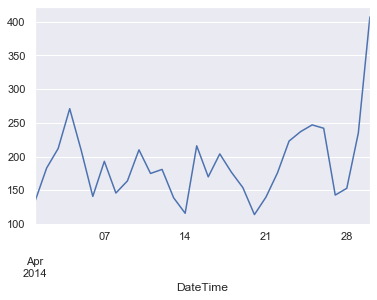

In [33]:
data_201404.plot()

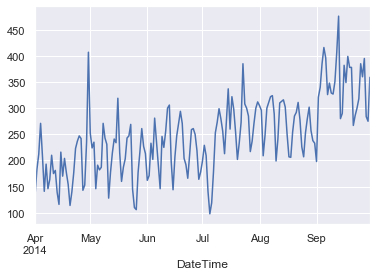

In [34]:
data_2014.Base.resample('D').count().plot()

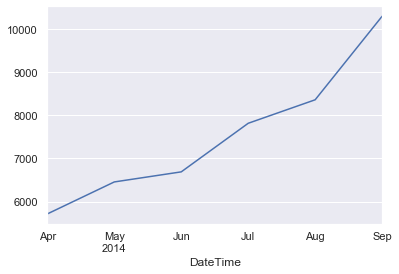

In [35]:
data_2014.Base.resample('M').count().plot()

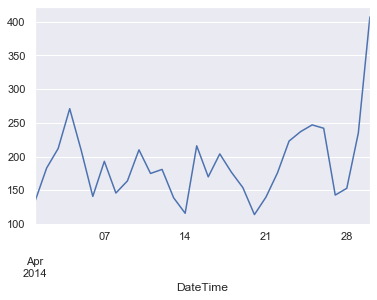

In [36]:
data_2014.Base['2014-04'].resample('D').count().plot()

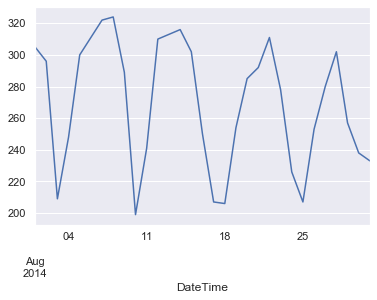

In [37]:
data_2014.Base['2014-08'].resample('D').count().plot()

In [38]:
data_2014.Base['2014-08'].resample('M').count()

DateTime
2014-08-31    8364
Freq: M, Name: Base, dtype: int64

In [39]:
data_2014.Base['2014-04'].resample('M').count()

DateTime
2014-04-30    5712
Freq: M, Name: Base, dtype: int64

In [40]:
# Add columns with year, month, and weekday name
data_2014['Year'] = data_2014.index.year
data_2014['Month'] = data_2014.index.month
data_2014['WeekdayName'] = data_2014.index.weekday_name

In [41]:
data_2014.head(10)

,Lat,Lon,Base,n,Year,Month,WeekdayName
DateTime,,,,,,,
2014-08-26 19:49:00,40.7270,-73.9767,B02682,1,2014,8,Tuesday
2014-08-31 14:40:00,40.7482,-73.9927,B02617,1,2014,8,Sunday
2014-09-10 15:48:00,40.7557,-73.9895,B02764,1,2014,9,Wednesday
2014-08-15 20:47:00,40.7081,-74.0116,B02617,1,2014,8,Friday
2014-09-17 15:10:00,40.7417,-73.9894,B02598,1,2014,9,Wednesday
2014-07-02 05:49:00,40.7675,-73.8666,B02682,1,2014,7,Wednesday
2014-08-22 16:31:00,40.7596,-73.9738,B02598,1,2014,8,Friday
2014-09-16 16:25:00,40.6466,-73.7894,B02598,1,2014,9,Tuesday
2014-07-22 16:50:00,40.7642,-73.9818,B02617,1,2014,7,Tuesday


In [42]:
data_2014.groupby('Month').count()

,Lat,Lon,Base,n,Year,WeekdayName
Month,,,,,,
4,5712,5712,5712,5712,5712,5712
5,6455,6455,6455,6455,6455,6455
6,6689,6689,6689,6689,6689,6689
7,7818,7818,7818,7818,7818,7818
8,8364,8364,8364,8364,8364,8364
9,10305,10305,10305,10305,10305,10305


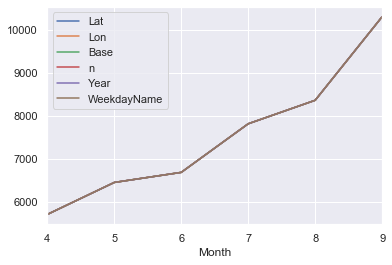

In [43]:
data_2014.groupby('Month').count().plot()

In [66]:
data_2014['n'].groupby('WeekdayName').count().plot(kind='bar')

KeyError: 'WeekdayName'

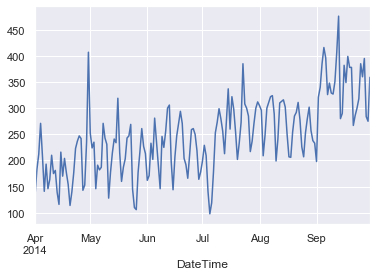

In [53]:
data_2014.n.resample('D').sum().plot()

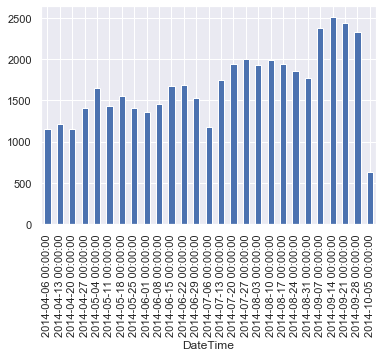

In [58]:
data_2014.n.resample('W').sum().plot(kind='bar')

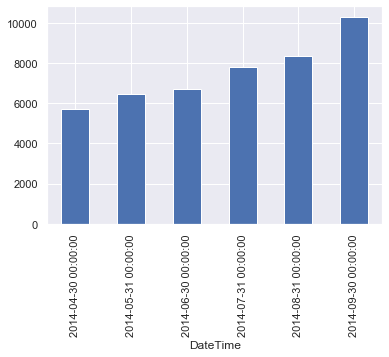

In [57]:
data_2014.n.resample('m').sum().plot(kind='bar')

Data source:
- https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city/data
Other ressources:
- https://data-flair.training/blogs/r-data-science-project-uber-data-analysis/
